# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

# Import Libraries
Import a few libraries you think you'll need (Or just import them as you go along!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data
Read in the advertising.csv file and set it to a data frame called ad_data.

In [3]:
customers = pd.read_csv("Ecommerce Customers")

Check the head of the customer data

In [5]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Check the info and describe of customer data 

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis
Let's use seaborn to explore the data!

**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

<Figure size 720x504 with 0 Axes>

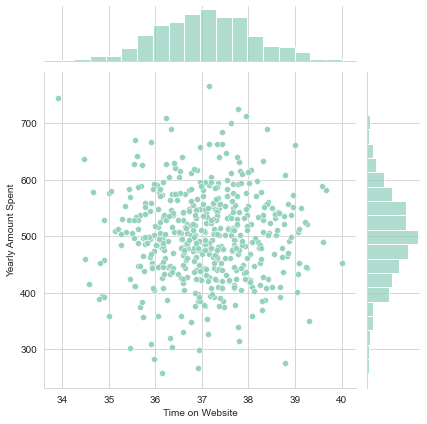

In [9]:
sns.set_palette("GnBu_d")
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

**The same but with the Time on App column instead.**

<Figure size 720x504 with 0 Axes>

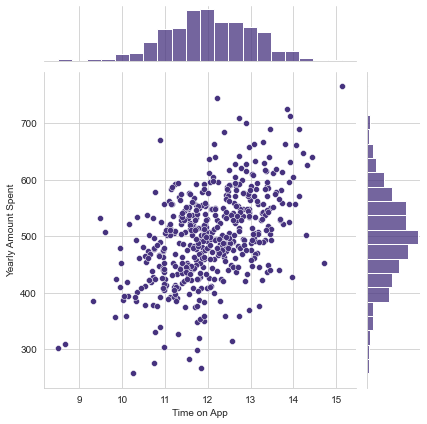

In [10]:
sns.set_palette("viridis")
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

**Jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

<Figure size 720x504 with 0 Axes>

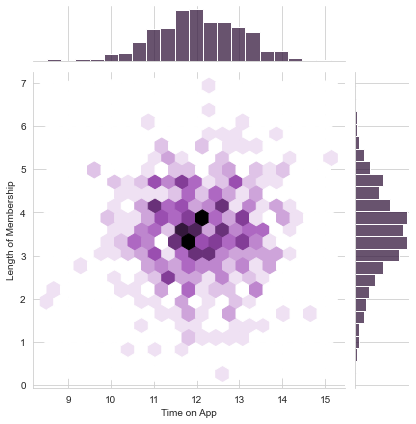

In [11]:
sns.set_palette('rocket')
plt.figure(figsize=(10,7))
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

**Create a pairplot to explore these types of relationships across the entire data set.**

<Figure size 720x504 with 0 Axes>

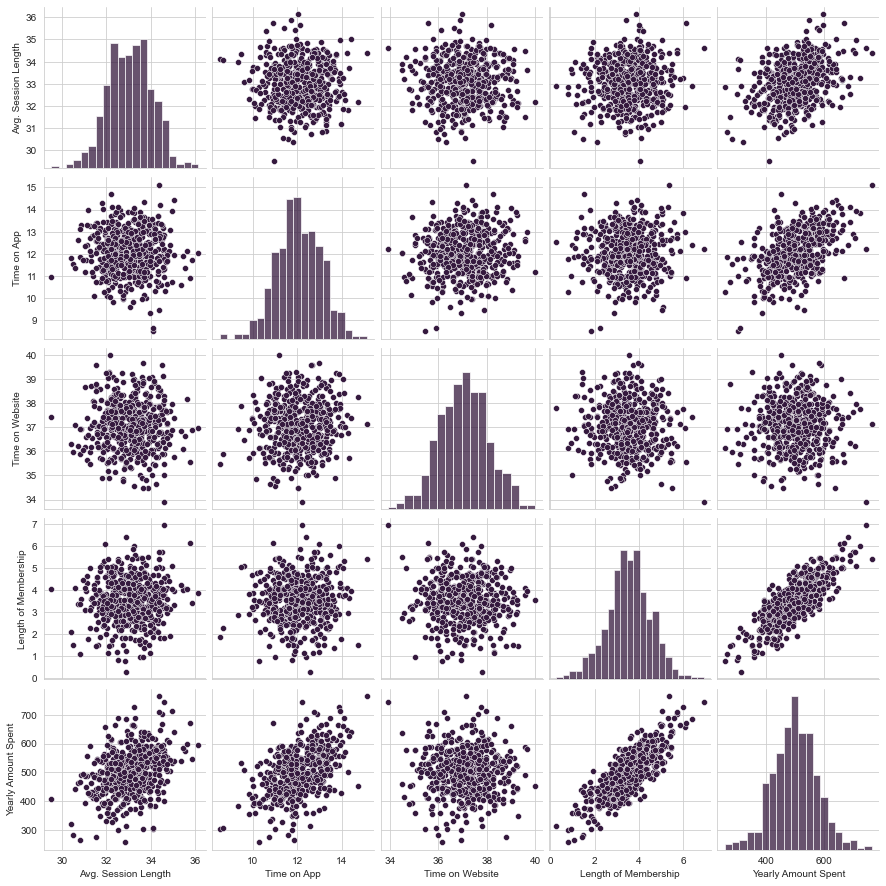

In [12]:
plt.figure(figsize=(10,7))
sns.pairplot(data=customers,palette='maco')

Based on the plot above , the feature which looks more co-related with **"Yearly Amount Spent"** is **"Length of Membership"**

**A linear model plot (using seaborn's lmplot) of "Yearly Amount Spent vs. Length of Membership."**

<Figure size 720x504 with 0 Axes>

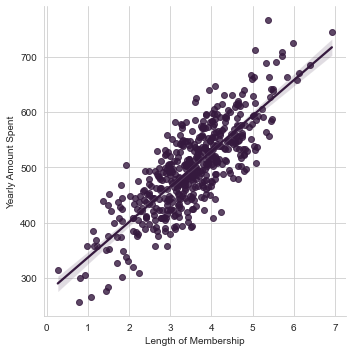

In [13]:
plt.figure(figsize=(10,7))
sns.lmplot(x="Length of Membership",y='Yearly Amount Spent',data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [14]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [15]:
X = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = customers['Yearly Amount Spent']

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets with test_size=0.3 and random_state=101**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Training the Model

Now its time to train our model on our training data!

**Import LinearRegression from sklearn.linear_model**

In [18]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lr.**

In [19]:
lr = LinearRegression()

**Train/fit lr on the training data.**

In [20]:
lr.fit(X_train,y_train)

LinearRegression()

**The coefficients of the model**

In [22]:
print("Coefficients:\n",lr.coef_)

Coefficients:
 [25.98154972 38.59015875  0.19040528 61.27909654]


# Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Predict off the X_test set of the data.**

In [23]:
y_pred = lr.predict(X_test)

**Scatterplot of the real test values versus the predicted values.**

<AxesSubplot:xlabel='Y Test', ylabel='Y Prediction'>

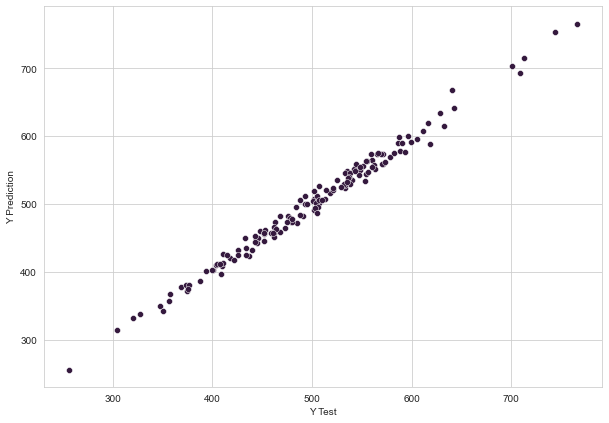

In [24]:
plt.figure(figsize=(10,7))
plt.xlabel("Y Test")
plt.ylabel("Y Prediction")
sns.scatterplot(x=y_test,y=y_pred)

# Evaluating the Model

Evaluating our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error**

In [25]:
from sklearn import metrics

print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error :  7.228148653430806
Mean Squared Error :  79.8130516509741
Root Mean Squared Error :  8.933815066978614


# Residuals

Exploring the residuals to make sure everything was okay with our data. 

**Ploting a histogram of the residuals and make sure it looks normally distributed.**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

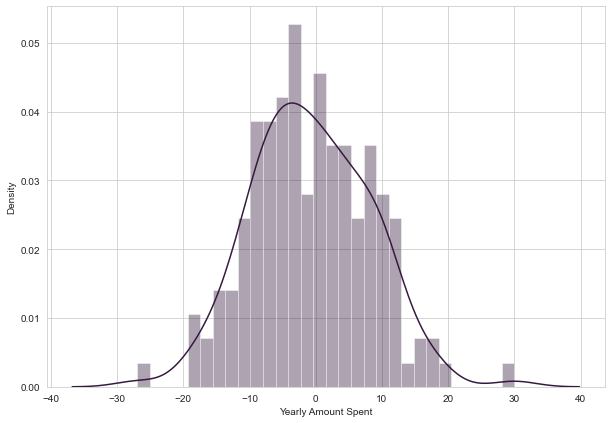

In [26]:
plt.figure(figsize=(10,7))
sns.distplot((y_test - y_pred),bins=30)

## Conclusion

In [27]:
coefficients = pd.DataFrame(lr.coef_,X.columns)
coefficients.columns=['Co efficients']
coefficients

,Co efficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpretation is here :

- Holding all the other features constant , a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent** 
- Holding all the other features constant , a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent** 
- Holding all the other features constant , a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent** 
- Holding all the other features constant , a 1 unit increase in **Length on Membership** is associated with an **increase of 61.27 total dollars spent** 

If we are comparing **Time on App** v/s **Time on Website** , as per the interpretation of the coefficients **Time spend on the App** looks promising.